 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head(10)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace = True)
print(whale_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(algo_df)

              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().any()


Algo 1    False
Algo 2     True
dtype: bool

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace = True)
print(algo_df)

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
#df = pd.read_csv(sp500_history_csv)
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(sp500_df)

               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
...              ...
2012-10-05  $1460.93
2012-10-04  $1461.40
2012-10-03  $1450.99
2012-10-02  $1445.75
2012-10-01  $1444.49

[1649 rows x 1 columns]


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$','',)
sp500_df['Close'] = sp500_df['Close'].astype("float")
sp500_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [11]:
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_dayreturns_df = sp500_df.pct_change()
sp500_dayreturns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_dayreturns_df.isnull().any()
sp500_dayreturns_df.dropna(inplace = True)
print(sp500_dayreturns_df)

               Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1648 rows x 1 columns]


In [14]:
# Rename Column
# YOUR CODE HERE
columns = ["sp500Daily Returns"]
sp500_dayreturns_df.columns = columns
sp500_dayreturns_df.head()


,sp500Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [80]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
joint_df = pd.concat([whale_df, algo_df,sp500_dayreturns_df], axis="columns", join="inner")
joint_df
print(joint_df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

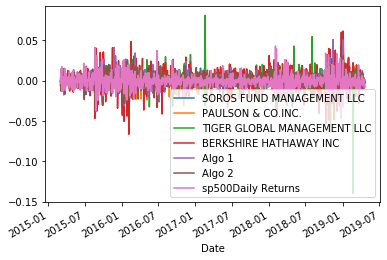

In [81]:
# Plot daily returns
# YOUR CODE HERE
joint_df.plot()

In [82]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + joint_df).cumprod() - 1
cumulative_returns 


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123
...,...,...,...,...,...,...,...
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438


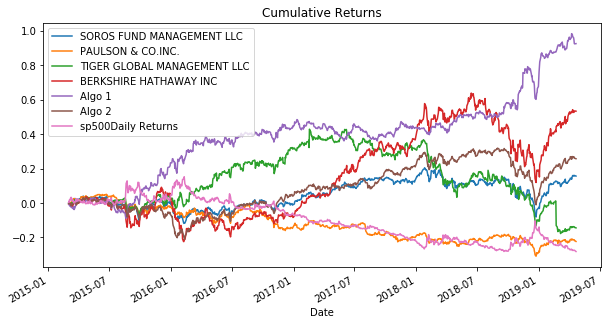

In [83]:
cumulative_returns.plot(figsize=(10,5), title = "Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

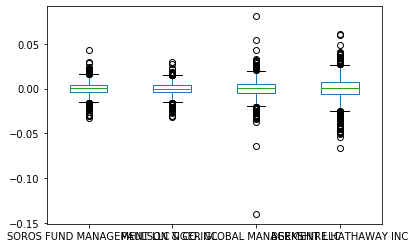

In [84]:
# Box plot to visually show risk
# YOUR CODE HERE
whale_df.plot.box()

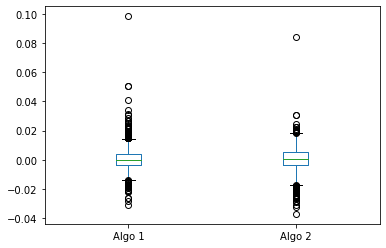

In [85]:
algo_df.plot.box()

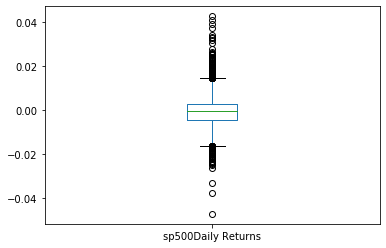

In [86]:
sp500_dayreturns_df.plot.box()

In [22]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
whale_std = whale_df.std()
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [23]:
algo_std = algo_df.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [24]:
sp500_dayreturns_std = sp500_dayreturns_df.std()
sp500_dayreturns_std.head()

sp500Daily Returns    0.008135
dtype: float64

In [25]:
joint_std = joint_df.std()
joint_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
dtype: float64

In [26]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp500_risk = joint_df["sp500Daily Returns"].std()
joint_df.std()>sp500_risk 

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                          True
sp500Daily Returns             False
dtype: bool

In [27]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = joint_df.std()*np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

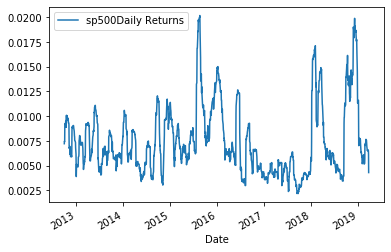

In [31]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_dayreturns_df.rolling(window=21).std().plot()


In [48]:
# Correlation
# YOUR CODE HERE
returns_correlation = joint_df.corr()
returns_correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,NaN,NaN,NaN
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,1.000000,0.346568,NaN
Algo 2,NaN,NaN,NaN,NaN,0.346568,1.000000,NaN
sp500Daily Returns,NaN,NaN,NaN,NaN,NaN,NaN,1.0


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

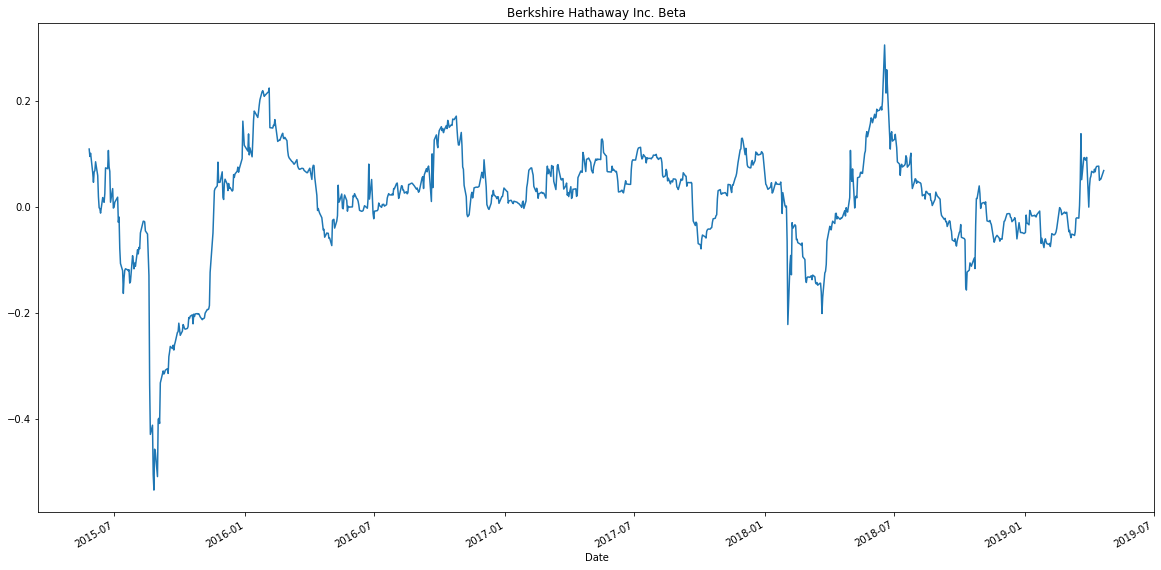

In [87]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
print(joint_df)
variance = joint_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).var()
variance
covariance = joint_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(joint_df["sp500Daily Returns"])
whale_beta = covariance/variance
whale_beta.dropna()
print(whale_beta)
whale_beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [88]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (joint_df.mean()*252)/(joint_df.std()*np.sqrt(252))


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

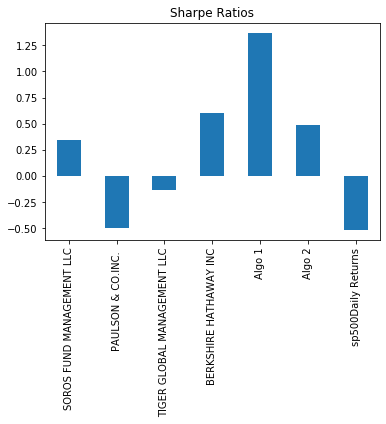

In [89]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [90]:
# Read the first stock
# YOUR CODE HERE
Johnson_Johnson_Prices_csv = Path("./Resources/Johnson&Johnson_Prices.csv")

In [91]:
# Read the second stock
# YOUR CODE HERE
Merck_Prices_csv = Path("./Resources/Merck_Prices.csv")
Merck_Prices_csv


WindowsPath('Resources/Merck_Prices.csv')

In [66]:
# Read the third stock
# YOUR CODE HERE
Abbott_Labs_Prices_csv = Path("./Resources/Abbott Labs Prices.csv")
Abbott_Labs_Prices_df = pd.read_csv(Abbott_Labs_Prices_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
Abbott_Labs_Prices_df.head()

,Close
Date,
2019-04-09,78.67
2019-04-10,78.97
2019-04-11,78.51
2019-04-12,78.01
2019-04-15,77.50


In [56]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
Pharma_stocks_df = pd.concat([Johnson_Johnson_Prices_csv, Merck_Prices_csv, Abbott_Labs_Prices_csv])
Pharma_stocks_df.head(10)

TypeError: cannot concatenate object of type '<class 'pathlib.WindowsPath'>'; only Series and DataFrame objs are valid

In [31]:
# Reset the index
# YOUR CODE HERE
Pharma_stocks_df = pd.read_csv(Pharma_stocks_csv, index_col="Date", infer_datetime_format=True)
Pharma_stocks_df.head(10)

In [33]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE

In [38]:
# Rolling
# YOUR CODE HERE

In [39]:
# Beta
# YOUR CODE HERE

In [40]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE